In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import nltk
from wordcloud import WordCloud
from nltk.tokenize import word_tokenize, regexp_tokenize
from nltk.corpus import stopwords
from collections import Counter

In [2]:
fake = pd.read_csv('Fake.csv')

In [3]:
real = pd.read_csv('True.csv')

## To know the dataset better:

**Question 1: How many fake and real news?**

In [4]:
#fake is 1, real is 0
fake['class'] = 1
real['class'] = 0

In [5]:
data = pd.concat([fake, real], axis=0)

In [6]:
data.head(5)

,title,text,subject,date,class
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",1
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",1
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",1
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",1
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",1


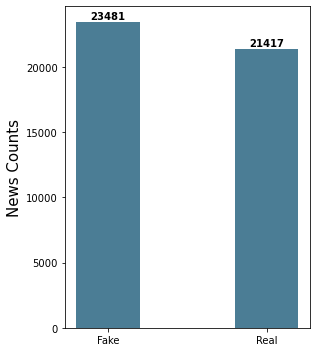

In [7]:
fig, ax = plt.subplots(figsize=(4.5,5))
plt.bar(['Fake', 'Real'], data['class'].value_counts(), width=0.4, color='#4B7D95', align='center')
#ax.set_facecolor('#D1D8E2')
for i, v in enumerate(data['class'].value_counts()):
    #print(i, v)
    ax.text(i - 0.11, v + 200,str(v), color='black', fontweight='bold')
ax.set_ylabel('News Counts',size=15)
plt.tight_layout()
plt.show()

**Question 2: When are the news published?**

In [8]:
'''
data['date'].str.match(pat = '\w+ \d+, \d+')
#returns the date string that matched a patter of "word number, number", as in "December 17, 2016"#
'''
print('All news were published from ', np.min(data.loc[data['date'].str.match(pat = '\w+ \d+, \d+')]['date'].unique()),\
     ' to ', np.max(data.loc[data['date'].str.match(pat = '\w+ \d+, \d+')]['date'].unique()))

All news were published from  Apr 1, 2015  to  September 9, 2017 


**Question 3: What is the distribution of news published over the time range?(month, year)**

In [9]:
data_valid_dates = data.loc[data['date'].str.match(pat = '\w+ \d+, \d+')]
pd.DataFrame(data_valid_dates['date'].value_counts().values, data_valid_dates['date'].value_counts().index)

,0
"December 20, 2017",182
"December 6, 2017",166
"November 30, 2017",162
"November 9, 2017",158
"October 13, 2017",155
...,...
"June 24, 2017",1
"December 19, 2017",1
"December 22, 2017",1
"November 19, 2017",1


**Question 4: How long is the news?**

In [10]:
print('The longest news include', max(data['text'].str.len()), 'word/words')

The longest news include 51794 word/words


In [11]:
print('The shortest news include', min(data['text'].str.len()), 'word/words')

The shortest news include 1 word/words


**Question 5: What is in the shorest news?**

In [12]:
data[data['text'].str.len() == 1]

,title,text,subject,date,class
10923,TAKE OUR POLL: Who Do You Think President Trum...,,politics,"May 10, 2017",1
11041,Joe Scarborough BERATES Mika Brzezinski Over “...,,politics,"Apr 26, 2017",1
11190,WATCH TUCKER CARLSON Scorch Sanctuary City May...,,politics,"Apr 6, 2017",1
11225,MAYOR OF SANCTUARY CITY: Trump Trying To Make ...,,politics,"Apr 2, 2017",1
11236,SHOCKER: Public School Turns Computer Lab Into...,,politics,"Apr 1, 2017",1
...,...,...,...,...,...
21826,FULL VIDEO: THE BLOCKBUSTER INVESTIGATION INTO...,,left-news,"Apr 25, 2015",1
21827,(VIDEO) HILLARY CLINTON: RELIGIOUS BELIEFS MUS...,,left-news,"Apr 25, 2015",1
21857,(VIDEO)ICE PROTECTING OBAMA: WON’T RELEASE NAM...,,left-news,"Apr 14, 2015",1
21873,(VIDEO) HYSTERICAL SNL TAKE ON HILLARY’S ANNOU...,,left-news,"Apr 12, 2015",1


In [13]:
data[data['text'].str.len() == 1]['class'].value_counts()

1    626
0      1
Name: class, dtype: int64

Of all non-text news, only one is real news.

**Question 6: What is in the longest news?**

In [14]:
print('The longest news among all fake news: ', max(data.loc[data['class'] == 1]['text'].str.len()), 'words')

The longest news among all fake news:  51794 words


In [15]:
longest_text_fake = data[data['text'].str.len() == 51794]['text'][22303]
cloud_longest_fake = WordCloud(stopwords = set(nltk.corpus.stopwords.words("english"))).generate(longest_text_fake)

Fake news word cloud


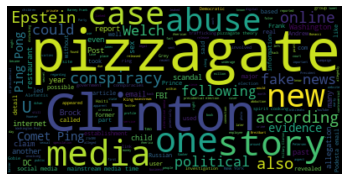

In [16]:
print('Fake news word cloud')
plt.imshow(cloud_longest_fake, interpolation='bilinear')
plt.axis('off')
plt.show()

In [17]:
print('The longest news among all real news: ', max(data.loc[data['class'] == 0]['text'].str.len()), 'words')

The longest news among all real news:  29781 words


In [18]:
longest_text_real = data[data['text'].str.len() == 29781]['text'][2816]
cloud_longest_real = WordCloud(stopwords = set(nltk.corpus.stopwords.words("english"))).generate(longest_text_real)

Real news word cloud


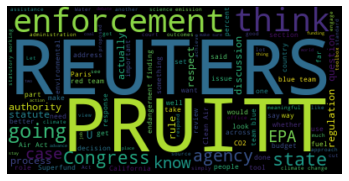

In [19]:
print('Real news word cloud')
plt.imshow(cloud_longest_real, interpolation='bilinear')
plt.axis('off')
plt.show()

In [20]:
np.random.seed(1000)
sample_text_fake = np.sum(np.random.choice(data.loc[data['class'] == 1]['text'], 1000)).lower()
sample_text_real = np.sum(np.random.choice(data.loc[data['class'] == 0]['text'], 1000)).lower()

Fake news word cloud


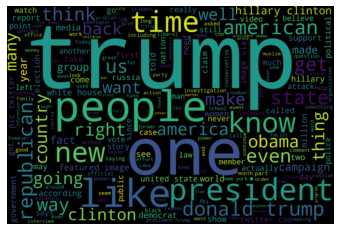

In [21]:
stop_words = nltk.corpus.stopwords.words("english")
stop_words.extend(['u', 'would', 'said', 'say', 'could', 'also'])
cloud_longest_fake = WordCloud(width = 3000,height = 2000,stopwords = set(stop_words)).generate(sample_text_fake)
print('Fake news word cloud')
plt.imshow(cloud_longest_fake, interpolation='bilinear')
plt.axis('off')
plt.show()

Real news word cloud


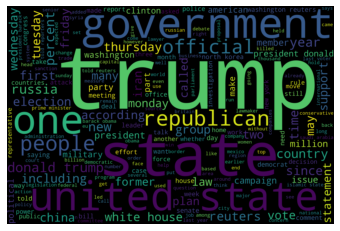

In [22]:
cloud_longest_real = WordCloud(width = 3000,height = 2000, stopwords = set(stop_words)).generate(sample_text_real)
print('Real news word cloud')
plt.imshow(cloud_longest_real, interpolation='bilinear')
plt.axis('off')
plt.show()

In [25]:
sample_text_fake_token = word_tokenize(sample_text_fake)
# Retain alphabetic lower case words: alpha_only
alpha_only_fake = [t.lower() for t in sample_text_fake_token if t.isalpha()]

# Remove all stop words: no_stops
no_stops_fake = [t for t in alpha_only_fake if t not in stopwords.words('english')]
Counter(no_stops_fake)

Counter({'white': 612,
         'house': 472,
         'chief': 84,
         'staff': 92,
         'john': 173,
         'kelly': 47,
         'says': 289,
         'stunned': 14,
         'learn': 34,
         'congresswoman': 3,
         'frederica': 2,
         'wilson': 12,
         'listened': 10,
         'president': 1253,
         'call': 162,
         'fallen': 13,
         'soldier': 9,
         'wife': 69,
         'came': 156,
         'press': 215,
         'briefing': 17,
         'let': 193,
         'goes': 90,
         'steps': 17,
         'happens': 53,
         'someone': 146,
         'military': 142,
         'killed': 64,
         'members': 149,
         'best': 136,
         'population': 50,
         'said': 1358,
         'brokenhearted': 1,
         'found': 150,
         'member': 140,
         'congress': 125,
         'heartfelt': 5,
         'moment': 66,
         'amazing': 26,
         'great': 191,
         'job': 127,
         'cutting': 21,
        

In [26]:
sample_text_real_token = word_tokenize(sample_text_real)
# Retain alphabetic lower case words: alpha_only
alpha_only_real = [t.lower() for t in sample_text_real_token if t.isalpha()]

# Remove all stop words: no_stops
no_stops_real = [t for t in alpha_only_real if t not in stopwords.words('english')]
Counter(no_stops_real)

Counter({'dubai': 14,
         'reuters': 1372,
         'images': 10,
         'night': 80,
         'broadcast': 21,
         'around': 213,
         'middle': 96,
         'east': 129,
         'speak': 39,
         'loudly': 3,
         'words': 17,
         'one': 593,
         'hand': 52,
         'young': 53,
         'people': 743,
         'iran': 350,
         'dancing': 1,
         'streets': 29,
         'mark': 45,
         'pragmatist': 4,
         'men': 76,
         'women': 155,
         'together': 62,
         'president': 1323,
         'united': 821,
         'states': 873,
         'swaying': 2,
         'sword': 2,
         'dance': 2,
         'stars': 6,
         'absolute': 10,
         'rulers': 2,
         'saudi': 229,
         'arabia': 153,
         'publicly': 45,
         'calling': 63,
         'form': 45,
         'political': 381,
         'change': 169,
         'risks': 25,
         'prosecution': 21,
         'donald': 515,
         'trump': 2888,

**Question 7: How many duplicated titles and text in all news?**

In [ ]:
fig, ax = plt.subplots(figsize=(4.5,5))
plt.bar(['Fake', 'Real'], data.loc[data['text'].duplicated() & data['title'].duplicated()]['class'].value_counts(),\
       width=0.4, color='#4B7D95', align='center')
for i, v in enumerate(data.loc[data['text'].duplicated() & data['title'].duplicated()]['class'].value_counts()):
    #print(i, v)
    ax.text(i - 0.08, v + 100,str(v), color='black', fontweight='bold')
ax.set_ylabel('Duplicated News Counts',size=12)
plt.tight_layout()
plt.show()